In [610]:
import pandas as pd

In [611]:
housing_df = pd.read_csv('housingdata.csv')

In [612]:
print(housing_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [613]:
# CHAS, RAD, B columns가 주택가격 형성에 크게 중요하지 않다고 판단하고 제거하기로 결정
columns_to_drop = ['CHAS', 'RAD', 'B']
# CHAS, RAD, B 컬럼 제거
# pandas의 drop 메서드를 사용하여 DataFrame에서 지정한 열(또는 행)을 제거
housing_df_cleaned = housing_df.drop(columns=columns_to_drop)
# 3개의 컬럼을 제거한 데이터셋을 housing_df_cleaned에 변수로 지정
print(housing_df_cleaned)

        CRIM    ZN  INDUS    NOX     RM   AGE     DIS  TAX  PTRATIO  LSTAT  \
0    0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  296     15.3   4.98   
1    0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  242     17.8   9.14   
2    0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  242     17.8   4.03   
3    0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  222     18.7   2.94   
4    0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  222     18.7    NaN   
..       ...   ...    ...    ...    ...   ...     ...  ...      ...    ...   
501  0.06263   0.0  11.93  0.573  6.593  69.1  2.4786  273     21.0    NaN   
502  0.04527   0.0  11.93  0.573  6.120  76.7  2.2875  273     21.0   9.08   
503  0.06076   0.0  11.93  0.573  6.976  91.0  2.1675  273     21.0   5.64   
504  0.10959   0.0  11.93  0.573  6.794  89.3  2.3889  273     21.0   6.48   
505  0.04741   0.0  11.93  0.573  6.030   NaN  2.5050  273     21.0   7.88   

     MEDV  
0    24.0  
1    21.6  
2    34.7  
3    33.4  
4  

In [614]:
from sklearn.model_selection import train_test_split # data 분리작업
X = housing_df_cleaned.drop(columns=['MEDV'])  # 독립 변수. MEDV column을 제외하고 가져옴
y = housing_df_cleaned['MEDV']                 # 종속 변수. MEDV column만 가져옴

# 데이터 분리 (테스트 데이터를 30%로 사용, 70%는 훈련데이터로 사용)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 분리된 데이터 크기 확인
print("훈련 data (독립 변수):", X_train.shape)
print("테스트 data (독립 변수):", X_test.shape)
print("훈련 data (종속 변수):", y_train.shape)
print("테스트 data (종속 변수):", y_test.shape)
# random_state
# 난수 시드값
# random_state는 난수 생성기의 초기값(seed)을 지정
# 같은 random_state 값을 사용하면 동일한 무작위 결과가 재현됨
# -설정이유
# 결과 재현성:
# 머신러닝 실험에서 결과를 비교하거나 공유할 때, 데이터를 항상 동일하게 분리하는 것 중요
# random_state를 설정하지 않으면 매번 다른 데이터 분리가 이루어질 수 있음
# 디버깅:
# 데이터를 항상 동일한 방식으로 분리하면 코드의 버그를 추적하거나 모델을 개선할 때 더 쉽게 분석할 수 있음
# 협업:
# 다른 사람이 코드를 실행할 때도 동일한 결과를 얻을 수 있도록 보장
# 고정값 설정:
# random_state=42는 관습적으로 많이 사용되며, 반드시 42일 필요는 없다. 원하는 숫자를 사용해도 동일한 역할을 수행

훈련 data (독립 변수): (354, 10)
테스트 data (독립 변수): (152, 10)
훈련 data (종속 변수): (354,)
테스트 data (종속 변수): (152,)


In [615]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())  # 결측치 개수 확인

CRIM       17
ZN         15
INDUS      17
NOX         0
RM          0
AGE        13
DIS         0
TAX         0
PTRATIO     0
LSTAT      14
dtype: int64
CRIM       3
ZN         5
INDUS      3
NOX        0
RM         0
AGE        7
DIS        0
TAX        0
PTRATIO    0
LSTAT      6
dtype: int64


In [616]:
from sklearn.impute import SimpleImputer
# SimpleImputer : 결측치(NaN)**가 포함된 데이터를 특정 값(평균값, 중앙값, 최빈값 등)
# 으로 대체할 때 사용되는 scikit-learn 도구
# mean: 평균값으로 대체 (기본값)
# median: 중앙값으로 대체 
# most_frequent: 최빈값(가장 자주 등장하는 값)으로 대체
# constant: 지정된 값으로 대체(예: fill_value를 사용)
# SimpleImputer는 데이터가 수치형이어야 합니다. 범주형 데이터에는 적합하지 않음
# 결측치를 대체한 후 결과를 DataFrame으로 변환하는 것을 추천 
# 그렇지 않으면 열 이름(columns)이 손실됨

imputer = SimpleImputer(strategy='mean')
# 결측치(NaN)를 각 열의 평균값으로 대체

X_train_imputed = imputer.fit_transform(X_train)  
# 훈련 데이터 처리
# fit_transform:fit: 훈련 데이터 X_train의 각열에 대해 결측치를 대체할 값을 학습(평균값계산)
# transform: 계산된 평균값을 사용해 결측치를 대체한 새로운 데이터를 반환.

X_test_imputed = imputer.transform(X_test)       
# 테스트 데이터 처리
# transform: 훈련 데이터(X_train)에서 학습된 평균값을 사용해 X_test의 결측치를 대체
# 주의: 테스트 데이터에서는 fit_transform을 사용하지 않음 
# 이는 훈련 데이터의 통계값만을 사용해야 데이터 누출(data leakage)을 방지할 수 있기 때문

In [617]:
# 결과는 NumPy 배열로 반환되므로, 필요하면 DataFrame으로 변환해 사용해야함
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)
# columns=X_train.columns:변환된 DataFrame에 원래 열 이름을 할당

print("훈련 data 결측치 개수:", X_train_imputed.isnull().sum().sum())
print("테스트 data 결측치 개수:", X_test_imputed.isnull().sum().sum())

훈련 data 결측치 개수: 0
테스트 data 결측치 개수: 0


In [618]:
# IQR 방식으로 이상치를 제거하는 함수
def remove_outliers_iqr_pandas(data):
    cleaned_data = data.copy()  # 원본 데이터를 보호하기 위해 복사본 생성
    for column in cleaned_data.columns:
        Q1 = cleaned_data[column].quantile(0.25)  # 1사분위수(데이터의 하위 25% 값을 계산)
        Q3 = cleaned_data[column].quantile(0.75)  # 3사분위수(데이터의 상위 75% 값을 계산)
        IQR = Q3 - Q1  # IQR 계산
        lower_bound = Q1 - 1.5 * IQR  # 하한선
        upper_bound = Q3 + 1.5 * IQR  # 상한선
        # 이상치 제거
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

# 예시: X_train 데이터에 IQR 방식 적용
X_train_df = pd.DataFrame(X_train, columns=X.columns)  # X_train을 DataFrame으로 변환
X_train_cleaned = remove_outliers_iqr_pandas(X_train_df)

# 결과 출력
print("이상치 제거 전 X_train 데이터 크기:", X_train.shape)
print("이상치 제거 후 X_train 데이터 크기:", X_train_cleaned.shape)

이상치 제거 전 X_train 데이터 크기: (354, 10)
이상치 제거 후 X_train 데이터 크기: (162, 10)


In [619]:
# IQR 기준 계산
iqr_bounds = {
    column: (
        X_train_df[column].quantile(0.25) - 1.5 * (X_train_df[column].quantile(0.75) - X_train_df[column].quantile(0.25)),
        X_train_df[column].quantile(0.75) + 1.5 * (X_train_df[column].quantile(0.75) - X_train_df[column].quantile(0.25))
    )
    for column in X_train_df.columns
}
print(iqr_bounds)

{'CRIM': (np.float64(-4.180475), np.float64(7.186685000000001)), 'ZN': (np.float64(-30.0), np.float64(50.0)), 'INDUS': (np.float64(-14.325000000000006), np.float64(37.55500000000001)), 'NOX': (np.float64(0.17850000000000005), np.float64(0.9025)), 'RM': (np.float64(4.701124999999999), np.float64(7.870125)), 'AGE': (np.float64(-22.749999999999986), np.float64(162.45)), 'DIS': (np.float64(-2.916799999999999), np.float64(10.391199999999998)), 'TAX': (np.float64(-301.5), np.float64(1246.5)), 'PTRATIO': (np.float64(11.325000000000006), np.float64(25.524999999999995)), 'LSTAT': (np.float64(-7.035000000000001), np.float64(30.165))}


In [620]:
for column, (lower_bound, upper_bound) in iqr_bounds.items():   # IQR 계산 기준 확인 코드
    print(f"{column}: 하한선 = {lower_bound}, 상한선 = {upper_bound}")

CRIM: 하한선 = -4.180475, 상한선 = 7.186685000000001
ZN: 하한선 = -30.0, 상한선 = 50.0
INDUS: 하한선 = -14.325000000000006, 상한선 = 37.55500000000001
NOX: 하한선 = 0.17850000000000005, 상한선 = 0.9025
RM: 하한선 = 4.701124999999999, 상한선 = 7.870125
AGE: 하한선 = -22.749999999999986, 상한선 = 162.45
DIS: 하한선 = -2.916799999999999, 상한선 = 10.391199999999998
TAX: 하한선 = -301.5, 상한선 = 1246.5
PTRATIO: 하한선 = 11.325000000000006, 상한선 = 25.524999999999995
LSTAT: 하한선 = -7.035000000000001, 상한선 = 30.165


In [621]:
# IQR 기준으로 `X_test` 데이터 이상치 제거
def remove_outliers_iqr_test(data, iqr_bounds):
    cleaned_data = data.copy()
    for column, (lower_bound, upper_bound) in iqr_bounds.items():
        cleaned_data = cleaned_data[(cleaned_data[column] >= lower_bound) & (cleaned_data[column] <= upper_bound)]
    return cleaned_data

X_test_df = pd.DataFrame(X_test, columns=X.columns)  # `X_test`를 DataFrame으로 변환
X_test_cleaned = remove_outliers_iqr_test(X_test_df, iqr_bounds)


In [622]:
print("이상치 제거 전 X_test 데이터 크기:", X_test.shape)
print("이상치 제거 후 X_test 데이터 크기:", X_test_cleaned.shape)


이상치 제거 전 X_test 데이터 크기: (152, 10)
이상치 제거 후 X_test 데이터 크기: (92, 10)


In [623]:
# Scaling(Normalization or Standardization) :  정규화 혹은 표준화
# Standardization 표준화로 진행(특성(feature)을 평균이 0이고, 분산이 1이 되도록 변환하는 작업)
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
scaler = StandardScaler()

# 훈련 데이터 표준화 (fit + transform)
X_train_scaled = scaler.fit_transform(X_train_cleaned)

# 테스트 데이터 표준화 (transform만 사용)
X_test_scaled = scaler.transform(X_test_cleaned)

In [624]:
# 표준화된 데이터를 DataFrame으로 변환
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_cleaned.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_cleaned.columns)

# 표준화된 데이터 확인
print("train 데이터 (표준화 후):")
print(X_train_scaled_df.head())  # 상위 5개 행 출력

print("test 데이터 (표준화 후):")
print(X_test_scaled_df.head())

train 데이터 (표준화 후):
       CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0 -0.641674 -0.608007 -1.126333 -0.834948  0.126401 -0.226746  1.075485   
1 -0.376667 -0.608007 -0.313448 -0.988240 -1.271629 -1.199775  0.541025   
2  1.275320 -0.608007 -0.102064  0.391386 -0.798766 -1.375624  0.206613   
3 -0.636957 -0.608007 -1.126333 -0.834948  1.188008 -0.730845  1.075485   
4 -0.584356 -0.608007 -1.078213 -0.375073 -0.391318  0.167937 -0.470714   

        TAX   PTRATIO     LSTAT  
0 -1.285143  0.293541 -1.151431  
1 -1.120894 -0.075808  0.008578  
2 -0.015946  1.355420 -0.833588  
3 -1.285143  0.293541 -1.678075  
4 -1.718164 -0.121976  0.690664  
test 데이터 (표준화 후):
       CRIM        ZN     INDUS       NOX        RM       AGE       DIS  \
0 -0.591900  2.595151 -0.399377 -1.003569  0.739442 -1.234945 -0.027332   
1 -0.499615 -0.608007  3.266337  1.479757 -0.709053  1.340261 -1.255123   
2 -0.526009 -0.608007  0.356795 -1.524761 -0.555793 -2.215790  0.644883   
3  8.830

In [625]:
import seaborn as sns # seaborn설치(시각화도구)
import matplotlib.pyplot as plt # Python의 시각화 라이브러리

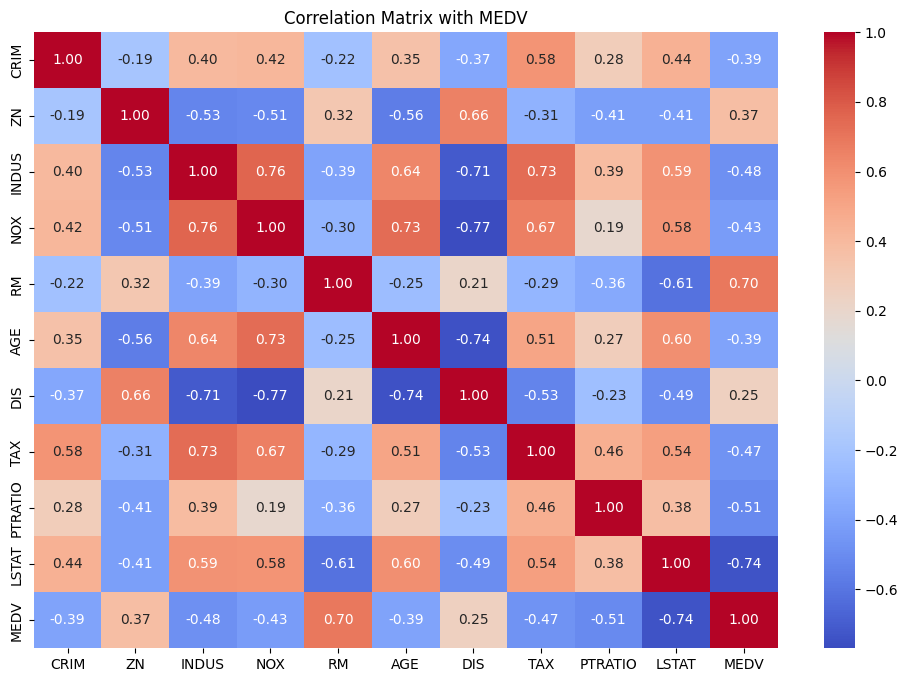

MEDV와의 상관관계:
 MEDV       1.000000
RM         0.695360
ZN         0.373136
DIS        0.249929
CRIM      -0.391363
AGE       -0.394656
NOX       -0.427321
TAX       -0.468536
INDUS     -0.481772
PTRATIO   -0.507787
LSTAT     -0.735822
Name: MEDV, dtype: float64


In [626]:
# 상관관계 행렬 계산
corr_matrix = housing_df_cleaned.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix with MEDV")
plt.show()

# MEDV와의 상관관계 출력
medv_corr = corr_matrix['MEDV'].sort_values(ascending=False)
print("MEDV와의 상관관계:\n", medv_corr)


In [627]:
# 특징 선택
# 선택 기준
# 상관계수의 절대값 기준:
# |상관계수| ≥ 0.7: 매우 강한 상관관계 
# 0.5 ≤ |상관계수| < 0.7: 강한 상관관계 
# 0.3 ≤ |상관계수| < 0.5: 중간 정도의 상관관계 
# |상관계수| < 0.3: 약한 상관관계 

In [628]:
# 상관관계 
# RM (주거당 평균 객실 수): 양의 상관관계(객실 수가 많을수록 주택 가격이 상승)
# LSTAT (하위 계층 비율): 음의 상관관계(하위 계층 비율이 높을수록 주택 가격이 감소)
# PTRATIO (학생-교사 비율) : 음의 상관관계(학생-교사 비율이 높을수록 주택 가격이 감소)
# TAX (재산세율) : 음의 상관관계(재산세율이 높을수록 주택 가격이 감소)
# NOX (질소산화물 농도) : 음의 상관관계(공기 오염도가 높을수록 주택 가격이 감소)

In [629]:
selected_features = ['RM', 'LSTAT', 'PTRATIO', 'TAX', 'NOX']
X_train_selected = X_train_cleaned[selected_features] # train data의 독립 변수(스케일링, 전차리를 한뒤의)중에 선택된 변수만 가져옴
X_test_selected = X_test_cleaned[selected_features] # test data의 의 독립 변수(스케일링, 전차리를 한뒤의) 중에 선택된 열만 선택

In [630]:
print(X_train_selected.shape) 
print(X_test_selected.shape)   
# 훈련 데이터의 샘플 수(행), 선택된 특성(변수)수 (열)
# 선택된 독립변수(x_train_selected)와 종속변수(Y-train)로 모델학습

(162, 5)
(92, 5)


In [631]:
# X_train_selected와 y_train을 데이터프레임으로 변환
X_train_selected = pd.DataFrame(X_train_selected)
y_train = pd.Series(y_train)

# X_train_selected의 인덱스와 동일하게 y_train 필터링
y_train = y_train.loc[X_train_selected.index]

print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"y_train shape: {y_train.shape}")

X_train_selected shape: (162, 5)
y_train shape: (162,)


In [632]:
from sklearn.linear_model import LinearRegression

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train_selected, y_train)


LinearRegression()

In [633]:
# 중간에 X_test_selected와 y_test의 크기 차이로 오류발생, X_test_selected와 동일한 인덱스를 사용하여 y_test를 필터링
print("X_test_selected 크기:", X_test_selected.shape)
print("y_test 크기:", y_test.shape)

X_test_selected 크기: (92, 5)
y_test 크기: (152,)


In [634]:
y_test = y_test.loc[X_test_selected.index]

In [635]:
# 테스트 데이터 예측
y_pred = model.predict(X_test_selected)


In [636]:
# 평가
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"평가 결과:\nMSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

평가 결과:
MSE: 9.56, MAE: 2.22, R²: 0.77


In [637]:
# 평가 결과 요약
# MSE (Mean Squared Error): 9.56
# 예측값과 실제값의 차이를 제곱한 후 평균을 구한 값
# 값이 작을수록 모델이 실제값에 더 가까운 예측을 하고 있다는 의미

# MAE (Mean Absolute Error): 2.22
# 예측값과 실제값의 절대적인 차이의 평균
# 모델이 평균적으로 약 2.22 단위만큼의 오차를 내고 있다는 것을 의미

# R² (R-Squared): 0.77
# 모델이 데이터를 얼마나 잘 설명하는지를 나타내는 지표
# 1.0에 가까울수록 더 나은 모델
# 0.77은 모델이 전체 데이터 분산의 77%를 설명하고 있다는 의미

In [638]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 의사결정 나무 모델 생성 및 학습
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_selected, y_train)

# 테스트 데이터 예측
y_pred_tree = tree_model.predict(X_test_selected)

In [639]:
# 평가 지표 계산
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"의사결정 나무 평가 결과:\nMSE: {mse_tree:.2f}, MAE: {mae_tree:.2f}, R²: {r2_tree:.2f}")

의사결정 나무 평가 결과:
MSE: 10.19, MAE: 2.51, R²: 0.76


In [640]:
from sklearn.model_selection import cross_val_score

cv_scores_tree = cross_val_score(tree_model, X_train_selected, y_train, cv=5, scoring='r2')
print("교차 검증 R² 점수:", cv_scores_tree)
print("평균 R² 점수:", cv_scores_tree.mean())


교차 검증 R² 점수: [0.62364949 0.51609979 0.76549228 0.80049529 0.4543946 ]
평균 R² 점수: 0.6320262908172755


In [641]:
#randomforst
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

# 모델 학습
rf_model.fit(X_train_selected, y_train)

# 테스트 데이터 예측
y_pred_rf = rf_model.predict(X_test_selected)

In [642]:
# 평가 지표 계산
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"랜덤 포레스트 평가 결과:\nMSE: {mse_rf:.2f}, MAE: {mae_rf:.2f}, R²: {r2_rf:.2f}")
# 랜덤 포레스트 평가 결과:
# MSE: 6.90, MAE: 1.83, R²: 0.83

랜덤 포레스트 평가 결과:
MSE: 6.90, MAE: 1.83, R²: 0.83


|Model|MSE|MAE|R^2|
|------|---|---|---|
|선형회귀|9.56|2.22|0.77|
|의사결정나무|10.19|2.51|0.76|
|랜덤포레스트|6.90|1.83|0.83|

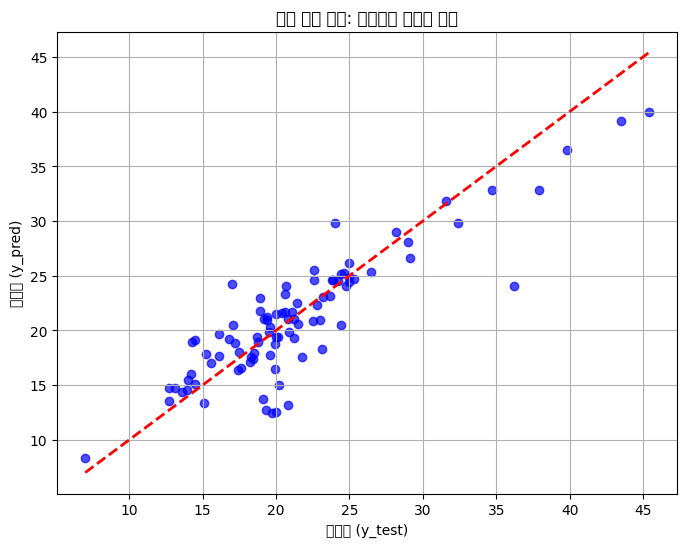

In [645]:
import matplotlib.pyplot as plt # 선형회귀모델 시각화

# 예측값과 실제값 비교
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("실제값 (y_test)")
plt.ylabel("예측값 (y_pred)")
plt.title("선형 회귀 모델: 예측값과 실제값 비교")
plt.grid(True)
plt.show()



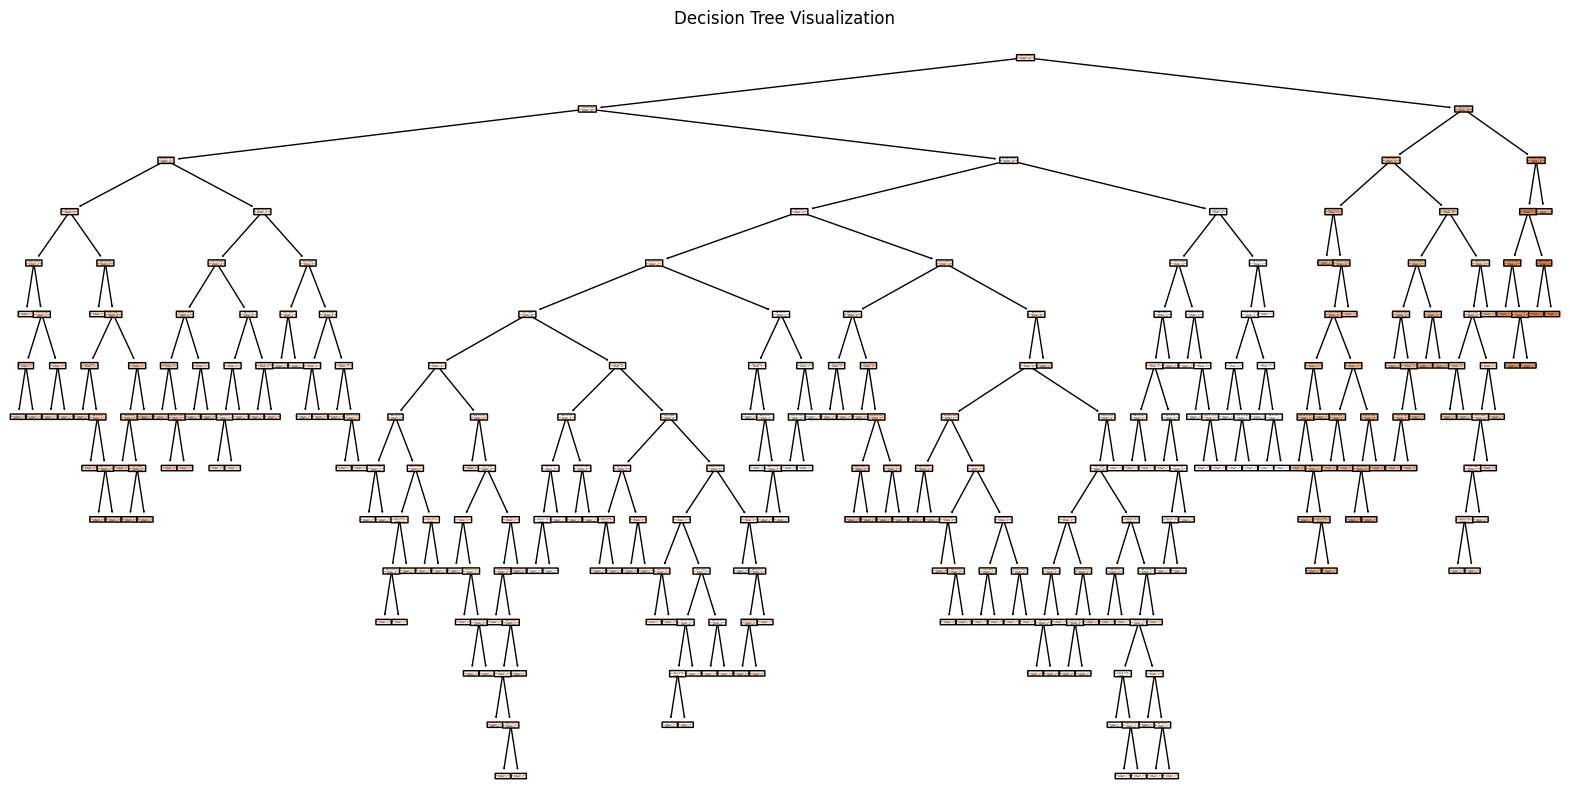

In [650]:
from sklearn.tree import plot_tree # 의사결정 나무 시각화
import matplotlib.pyplot as plt

# 의사결정 나무 모델 생성 및 학습 (기존 모델 사용)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_selected, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_train_selected.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


In [651]:
from sklearn.tree import export_text # 텍스트기반 시각화

# 트리 구조를 텍스트로 출력
tree_rules = export_text(tree_model, feature_names=list(X_train_selected.columns))
print(tree_rules)


|--- RM <= 6.80
|   |--- LSTAT <= 7.82
|   |   |--- PTRATIO <= 18.20
|   |   |   |--- RM <= 6.53
|   |   |   |   |--- NOX <= 0.43
|   |   |   |   |   |--- value: [23.70]
|   |   |   |   |--- NOX >  0.43
|   |   |   |   |   |--- LSTAT <= 5.96
|   |   |   |   |   |   |--- PTRATIO <= 15.75
|   |   |   |   |   |   |   |--- value: [27.00]
|   |   |   |   |   |   |--- PTRATIO >  15.75
|   |   |   |   |   |   |   |--- value: [25.00]
|   |   |   |   |   |--- LSTAT >  5.96
|   |   |   |   |   |   |--- NOX <= 0.53
|   |   |   |   |   |   |   |--- value: [24.70]
|   |   |   |   |   |   |--- NOX >  0.53
|   |   |   |   |   |   |   |--- value: [24.30]
|   |   |   |--- RM >  6.53
|   |   |   |   |--- NOX <= 0.43
|   |   |   |   |   |--- value: [23.30]
|   |   |   |   |--- NOX >  0.43
|   |   |   |   |   |--- TAX <= 292.50
|   |   |   |   |   |   |--- TAX <= 254.50
|   |   |   |   |   |   |   |--- value: [26.60]
|   |   |   |   |   |   |--- TAX >  254.50
|   |   |   |   |   |   |   |--- RM <= 6.59
| 

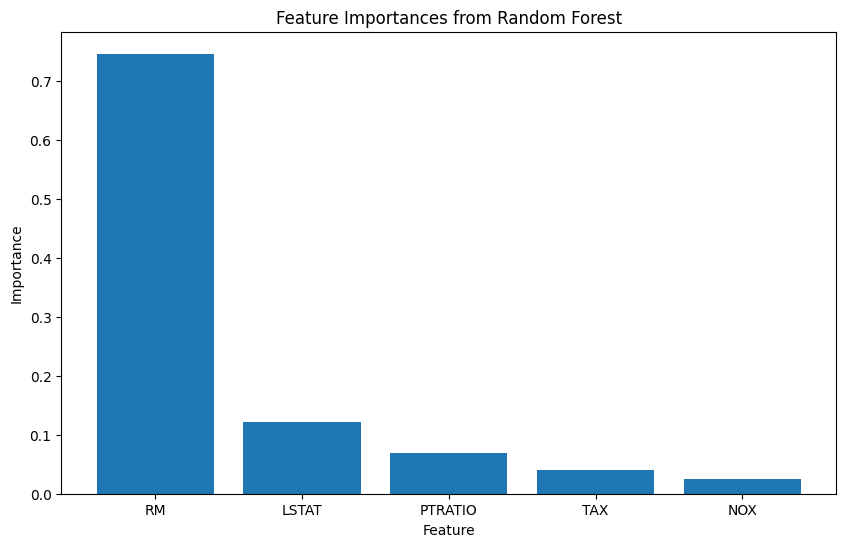

In [652]:
import matplotlib.pyplot as plt #랜덤포레스트 시각화
import pandas as pd

# 특성 중요도 추출
feature_importances = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()